In [14]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [13]:
#Reading datanbad_drv_df = pd.read_csv(r'C:\Users\firat\OneDrive\Masaüstü\road-accidents.csv',comment='#', sep='|')

row_col = bad_drv_df.shape

print('There are {} rows and {} columns.\n'.format(row_col[0], row_col[1]))

bad_drv_df.info()
bad_drv_df.head()

There are 51 rows and 5 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


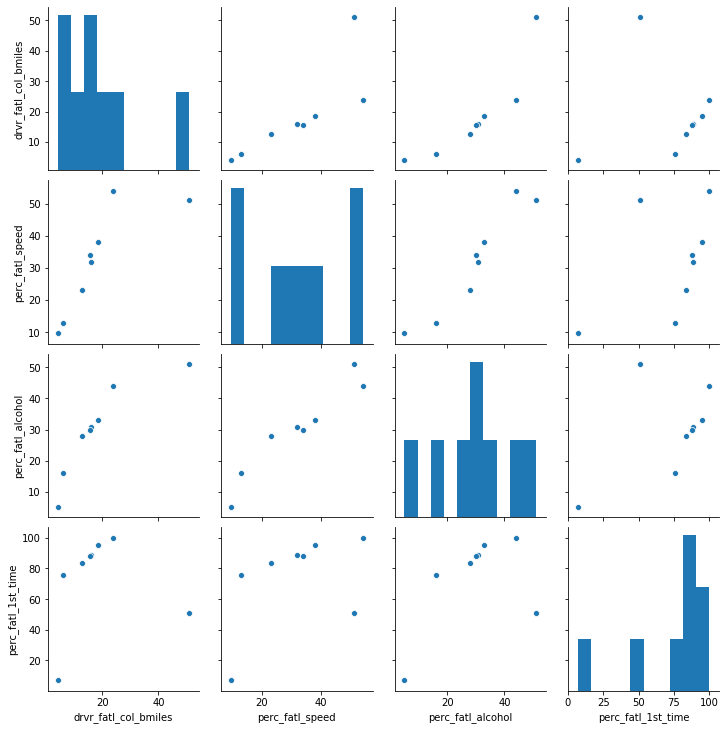

In [17]:
#CREATING A PAIRWISE SCATTER PLOT USING SUMMARY STATISTICS
stat_df = bad_drv_df.describe()

print(stat_df)
sns.pairplot(stat_df)

In [19]:
# Computing the correlation coefficent for all column pairs 

# 0.2 = weak
# 0.5 = medium
# 0.8 = strong
# 0.9 = very strong

corr_bad_drv = bad_drv_df.corr()
corr_bad_drv

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [23]:
# Creating the feature and target dataframes
feature_df = bad_drv_df[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
target_df = bad_drv_df['drvr_fatl_col_bmiles']

#Initializing a linear regression model
linreg = LinearRegression()

# Fitting a multivariate linear regression model
linreg.fit(feature_df, target_df)

# Retrieving regression coefficients
linreg_coef = linreg.coef_
linreg_coef

array([-0.04180041,  0.19086404,  0.02473301])

The cumulative variance of the first two principal components : 0.795


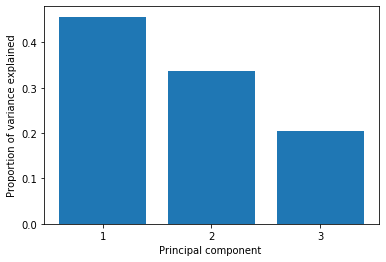

In [48]:
# Standardizing and centering the feature columns
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(feature_df)

#Initializing the PCA function and fitting standardized data to the pca
pca = PCA()
pca.fit(scaled_feature)

# Plotting the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component ')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Computing the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal components : {}".format(round(two_first_comp_var_exp, 3)))

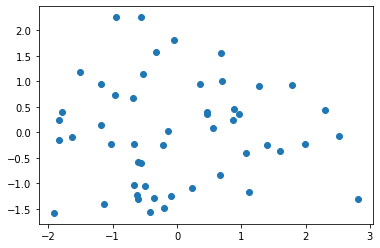

In [26]:
# Transforming the scaled features using two principal components
pca = PCA(n_components=2)
pca_comps = pca.fit_transform(scaled_feature)

# Extracting the first and second component to use for the scatter plot
pca_comp_1, pca_comp_2 = pca_comps[:,0], pca_comps[:, 1]

# Plotting the first two principal components in a scatter plot
plt.scatter(pca_comp_1, pca_comp_2)

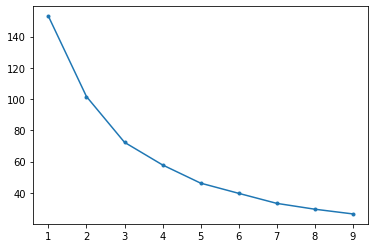

In [43]:
inertias = []

# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
for k in range(1,10):
    
    # Initializing KMeans object using the current number of clusters (k)
    k_mean = KMeans(n_clusters = k)
    k_mean.fit(scaled_feature)
    inertias.append(k_mean.inertia_)

# Plotting the results in a line plot
plt.plot(range(1, 10), inertias, marker ='.')

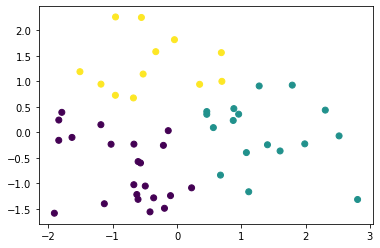

In [44]:
# Creating a KMeans object with 3 clusters
k_mean = KMeans(n_clusters = 3)
k_mean.fit(scaled_feature)

# Creating a scatter plot of the first two principal components and color it according to the KMeans cluster assignment 
plt.scatter(pca_comps[:, 0], pca_comps[:, 1], c=k_mean.labels_)

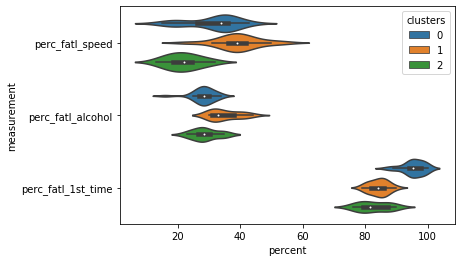

In [45]:
# Creating a new column with the labels from the KMeans clustering
bad_drv_df['clusters'] = k_mean.labels_

# Reshaping the DataFrame to the long format
melt_drv_df = pd.melt(bad_drv_df, id_vars='clusters', var_name='measurement',
                      value_name='percent',value_vars=['perc_fatl_speed','perc_fatl_alcohol', 'perc_fatl_1st_time'])

# Creating a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(y = 'measurement', x = 'percent', data = melt_drv_df, hue ='clusters')

,count,mean,sum
clusters,,,
0,11,860.505945,9465.5654
1,22,898.378595,19764.3291
2,18,911.406439,16405.3159


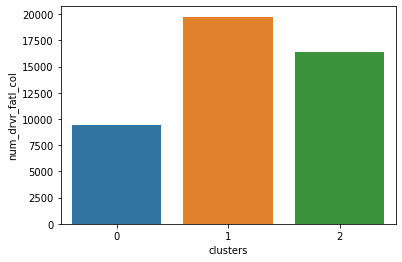

In [42]:
# Reading the `miles-drives.csv'
miles_df = pd.read_csv(r'C:\Users\firat\OneDrive\Masaüstü\miles-driven.csv', sep = '|')

# Merge the `bad_drv_df` DataFrame with the `miles_df` DataFrame
drv_mile_df = bad_drv_df.merge(miles_df,on='state')

# Creating a new column for the number of drivers involved in fatal accidents
drv_mile_df['num_drvr_fatl_col'] = drv_mile_df['drvr_fatl_col_bmiles'] * drv_mile_df['million_miles_annually'] / 1000

# Creating a barplot of the total number of accidents per cluster
sns.barplot(x='clusters', y='num_drvr_fatl_col', data=drv_mile_df, estimator=sum, ci=None)

# Calculating the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
cnt_mean_sum = drv_mile_df.groupby('clusters')['num_drvr_fatl_col'].agg(['count', 'mean', 'sum'])
cnt_mean_sum